In [38]:
#importing required libraries
import numpy as np
from matplotlib import pyplot as plt
import random

In [39]:
#defining sigmoid non-linearity and its derivative
def sig(x):
    return 1/(1+np.exp(-x))
def sig_der(y):
    return y*(1-y)

In [40]:
#function for splitting dataset into training and testing sets
def split_data(df,N):
    data = []
    train = np.empty((0,4),float)
    test = np.empty((0,4),float)
    for i in range(0,int(N)):
        train = np.append(train,np.array([df[i]]),axis=0)
    for i in range(int(N),T):
        test = np.append(test,np.array([df[i]]),axis=0)
    data.append(train)
    data.append(test)
    return data

#function for splitting training dataset into m mini-batches
def mini_batches(train_x,train_y,m):
    n = int(N/m)
    batch=[]
    batch_x = []        #contains the features x of the batches
    batch_y = []        #contains the labels y of the batches
    for i in range(n):
        temp = np.empty((0,3),float)
        temp1 = np.array([])
        for j in range(i*m,(i+1)*m):
            temp = np.append(temp,np.array([train_x[j]]),axis=0)
            temp1 = np.append(temp1,np.array([train_y[j]]),axis=0)
        batch_x.append(temp)
        batch_y.append(temp1)
    batch.append(batch_x)
    batch.append(batch_y)
    return batch
  
#function to calculate mean square error
def MSE(y,y_out):
    sum=0
    e = y-y_out
    for i in e:
        sum+=i*i
    return (sum)/len(y)

#function to predict label 
def predict(x,a1,a2,b):
    z1 = sig(np.dot(x,a1))
    z2 = sig(np.dot(x,a2))
    z = np.array([z1,z2,1])
    y_out = sig((np.dot(z,b)))
    return y_out

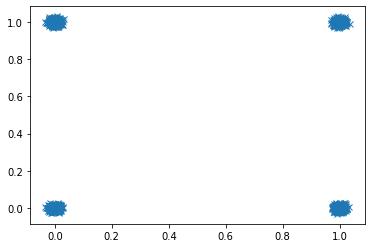

In [41]:
#(a) XOR

# #Generating samples 

T = 2500
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)

# Y contains the x1,x2 and the label of (x1,x2)
df = np.empty((4,0),float)
mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]^mean[i][1])
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df = df.T

plt.plot(df[:,0], df[:,1],'x')
plt.show()

N = 0.8*T
M = 0.2*T

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.random.uniform(low=-10,high=11,size=(3,))
a2 = np.random.uniform(low=-10,high=11,size=(3,))
b = np.random.uniform(low=-10,high=11,size=(3,))

#learning rate
g = 0.05

/tmp/ipykernel_11443/3685860136.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  z = np.array([z1,z2,1])


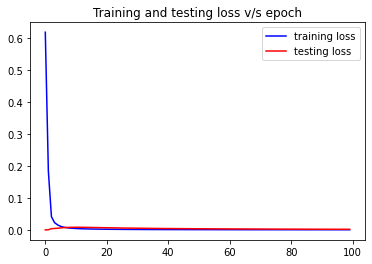

In [42]:
test_loss=[]
train_loss=[]
ex=[]
epoches=100
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,),float)
        grad_a2 = np.zeros((3,),float) 
        grad_b = np.zeros((3,),float)

        grad = []
        
        for j in range(m):
            x = X[j]
            y = Y[j]
            
            z1 = sig(np.dot(a1,x))
            z2 = sig(np.dot(a2,x))
            z = np.array([z1,z2,1]).T
            
            y_out = sig((np.dot(b,z)))
            d = -2*(y-y_out)*sig_der(y_out)
            g1 = d*b[0]*sig_der(z1)
            g2 = d*b[0]*sig_der(z2)

            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,g1*x)
            grad_a2 = np.add(grad_a2,g2*x)
            
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.legend()
plt.show()

In [43]:
print(predict(np.array([1,0,1]),a1,a2,b))
print(predict(np.array([0,0,1]),a1,a2,b))
print(predict(np.array([0,1,1]),a1,a2,b))
print(predict(np.array([1,1,1]),a1,a2,b))
print(a1)
print(a2)
print(b)

0.9554613931487133
0.0193553703777443
0.9804731252747683
0.01613312314319648
[-5.95617971  5.85832953  3.05019557]
[10.484579   -7.70213318  3.56591599]
[-8.00366683 -8.57280376 12.05369341]


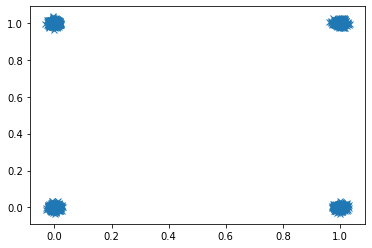

In [44]:
#(b) AND

# #Generating samples 

T = 2500
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)df = np.empty((0,4),float)
train = np.empty((4,0),float)
test = np.empty((4,0),float)

# Y contains the x1,x2 and the label of (x1,x2)
df = np.empty((4,0),float)
mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]&mean[i][1])
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df = df.T

plt.plot(df[:,0], df[:,1],'x')
plt.show()

N = 0.8*T
M = 0.2*T

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.random.uniform(low=-10,high=11,size=(3,))
a2 = np.random.uniform(low=-10,high=11,size=(3,))
b = np.random.uniform(low=-10,high=11,size=(3,))

#learning rate
g = 0.05

/tmp/ipykernel_11443/3685860136.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  z = np.array([z1,z2,1])


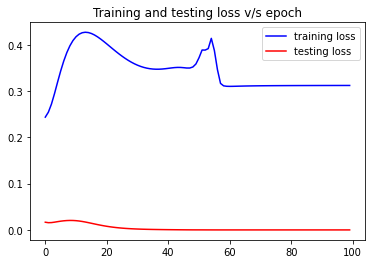

In [45]:
test_loss=[]
train_loss=[]
ex=[]
epoches=100
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,),float)
        grad_a2 = np.zeros((3,),float) 
        grad_b = np.zeros((3,),float)

        grad = []
        
        for j in range(m):
            x = X[j]
            y = Y[j]
            
            z1 = sig(np.dot(a1,x))
            z2 = sig(np.dot(a2,x))
            z = np.array([z1,z2,1]).T
            
            y_out = sig((np.dot(b,z)))
            d = -2*(y-y_out)*sig_der(y_out)
            g1 = d*b[0]*sig_der(z1)
            g2 = d*b[0]*sig_der(z2)

            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,g1*x)
            grad_a2 = np.add(grad_a2,g2*x)
            
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.legend()
plt.show()

In [46]:
print(predict(np.array([1,0,1]),a1,a2,b))
print(predict(np.array([0,0,1]),a1,a2,b))
print(predict(np.array([0,1,1]),a1,a2,b))
print(predict(np.array([1,1,1]),a1,a2,b))
print(a1)
print(a2)
print(b)

9.746574439022596e-06
0.002078013843255434
0.031930607847250214
0.0010155841680653545
[-9.86590221 -0.7813732  -5.66599316]
[-2.05439497  1.77633402  0.79050946]
[ -0.21046704  11.47272729 -14.06609265]


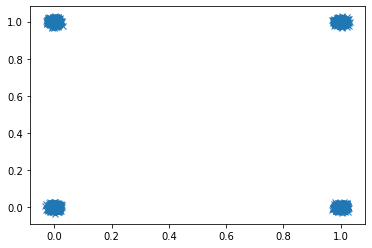

In [47]:
#(c) OR

# #Generating samples 

T = 2500
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)

df = np.empty((0,4),float)
train = np.empty((4,0),float)
test = np.empty((4,0),float)

# Y contains the x1,x2 and the label of (x1,x2)
df = np.empty((4,0),float)
mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]|mean[i][1])
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df = df.T

plt.plot(df[:,0], df[:,1],'x')
plt.show()

N = 0.8*T
M = 0.2*T

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.random.uniform(low=-10,high=11,size=(3,))
a2 = np.random.uniform(low=-10,high=11,size=(3,))
b = np.random.uniform(low=-10,high=11,size=(3,))

#learning rate
g = 0.05

/tmp/ipykernel_11443/3685860136.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  z = np.array([z1,z2,1])


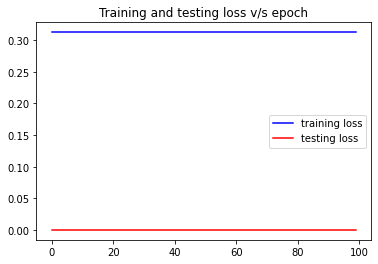

In [48]:
test_loss=[]
train_loss=[]
ex=[]
epoches=100
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,),float)
        grad_a2 = np.zeros((3,),float) 
        grad_b = np.zeros((3,),float)

        grad = []
        
        for j in range(m):
            x = X[j]
            y = Y[j]
            
            z1 = sig(np.dot(a1,x))
            z2 = sig(np.dot(a2,x))
            z = np.array([z1,z2,1]).T
            
            y_out = sig((np.dot(b,z)))
            d = -2*(y-y_out)*sig_der(y_out)
            g1 = d*b[0]*sig_der(z1)
            g2 = d*b[0]*sig_der(z2)

            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,g1*x)
            grad_a2 = np.add(grad_a2,g2*x)
            
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.legend()
plt.show()

In [49]:
print(predict(np.array([1,0,1]),a1,a2,b))
print(predict(np.array([0,0,1]),a1,a2,b))
print(predict(np.array([0,1,1]),a1,a2,b))
print(predict(np.array([1,1,1]),a1,a2,b))
print(a1)
print(a2)
print(b)

0.9999928427653002
0.9999928055734508
0.9999928012548518
0.9999928441899695
[ 0.31229192  9.32502706 10.42756405]
[-5.30523401  0.15811028 -6.6694262 ]
[ 9.39201307 -4.0503785   2.45559563]
